# **Ciencia de Datos 2021**

### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Load data

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']

In [3]:
colors = {0:'red', 1:'blue', 2:'green'}
c = []
for i in range(0, len(y)):
    c.append(colors[y[i]])

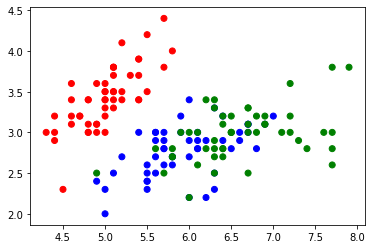

In [4]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=c)
plt.show()

In [6]:
# split de forma manuel (cuidando el balanceo de clases)

# reordenamiento aleatorio
n = X.shape[0]
idx = np.random.permutation(np.arange(0, n))
X = X[idx]
y = y[idx]

# separamos en clases 0, 1, 2
y0 = np.argwhere(y==0)
y1 = np.argwhere(y==1)
y2 = np.argwhere(y==2)

X0 = X[y0]
X1 = X[y1]
X2 = X[y2]

# construimos train / test (40 de cada clase en train, 10 en test)
p = 0.8
q = int(n*p/3)
Xtrain = np.vstack([X0[:q], X1[:q], X2[:q]]).reshape(-1,4)
Xtest  = np.vstack([X0[q:], X1[q:], X2[q:]]).reshape(-1,4)

Ytrain = np.stack(np.array(q*[0] + q*[1] + q*[2]))
Ytest  = np.stack(np.array((50-q)*[0] + (50-q)*[1] + (50-q)*[2]))

In [7]:
# split de forma automática (no cuida balanceo de clases)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [8]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(120, 4) (30, 4) (120,) (30,)


array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 1])

## Knn

In [10]:
knn = KNeighborsClassifier(n_neighbors=11)

model = knn.fit(Xtrain, Ytrain)

y_pred = model.predict(Xtest)

In [11]:
cfmatrix = confusion_matrix(Ytest, y_pred)
print(cfmatrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


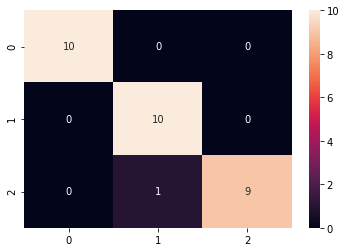

In [12]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [13]:
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Regiones de clasificación

### k = 1

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X[:,:2], y)

In [15]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

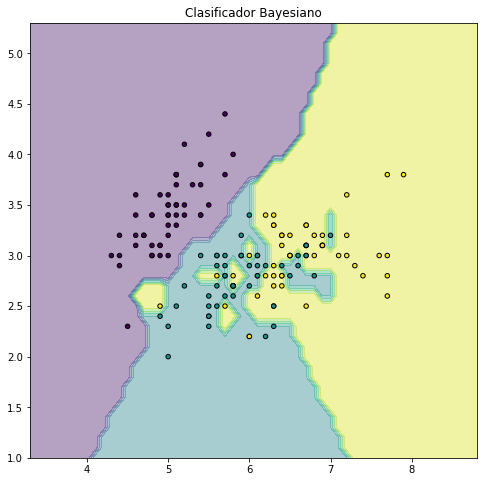

In [16]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
plt.title('Clasificador Bayesiano')
plt.show()

In [17]:
ypred = model.predict(X[:,:2])

In [18]:
print(confusion_matrix(y, ypred))

[[50  0  0]
 [ 0 44  6]
 [ 0  6 44]]


In [19]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.88      0.88      0.88        50
           2       0.88      0.88      0.88        50

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



### k = 5

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X[:,:2], y)

In [21]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

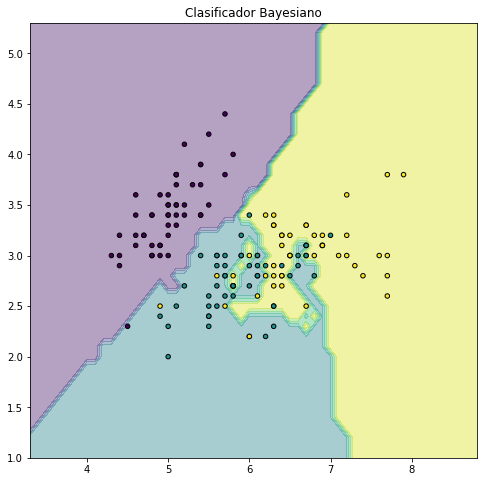

In [22]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
plt.title('Clasificador Bayesiano')
plt.show()

In [23]:
ypred = model.predict(X[:,:2])

In [24]:
print(confusion_matrix(y, ypred))

[[49  1  0]
 [ 0 37 13]
 [ 0 10 40]]


In [25]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.77      0.74      0.76        50
           2       0.75      0.80      0.78        50

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



### k = 11

In [26]:
knn = KNeighborsClassifier(n_neighbors=11)
model = knn.fit(X[:,:2], y)

In [27]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

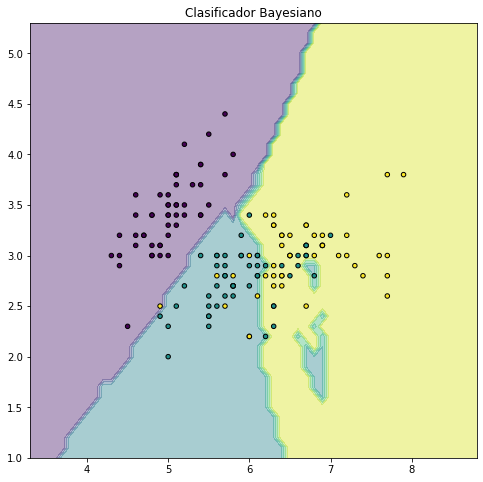

In [28]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
plt.title('Clasificador Bayesiano')
plt.show()

In [29]:
ypred = model.predict(X[:,:2])

In [30]:
print(confusion_matrix(y, ypred))

[[50  0  0]
 [ 0 36 14]
 [ 1 11 38]]


In [31]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.77      0.72      0.74        50
           2       0.73      0.76      0.75        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Knn Regressor

In [32]:
# Matrix de covarianzas
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [33]:
# variables a predecir
i = 3     # variable 4 (predictora)
j = 2     # variable 3 (predicha)

In [34]:
knnreg = KNeighborsRegressor(n_neighbors=5)
model = knnreg.fit(X[:,i].reshape(-1,1), X[:,j])
ypred = model.predict(X[:,i].reshape(-1,1))

In [35]:
minn = min(X[:,i].min(), X[:,j].min())
maxx = max(X[:,i].max(), X[:,j].max())
xx = np.linspace(minn, maxx, 101)

[]

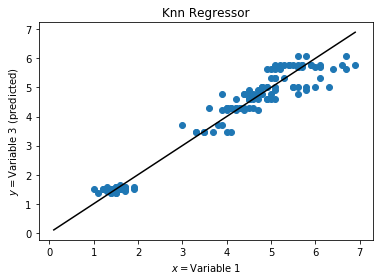

In [36]:
plt.figure()
plt.plot(xx,xx, 'k-')
plt.scatter(X[:,j], ypred.ravel())
plt.xlabel(r'$x=$' + 'Variable 1')
plt.ylabel(r'$y=$' + 'Variable 3 (predicted)')
plt.title('Knn Regressor')
plt.plot()

In [37]:
# error medio cuadrático
SSE = ((X[:,j] - ypred.ravel())**2).sum() / len(ypred)
SSE

0.13873066666666659